# Applied Statistics - Tasks

## Task 1: Permutations and Combinations

First: Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Second: Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

All imports requires for the full tasks notebook.   

In [1]:
# Imports
import math
import pandas
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels as sm
import seaborn as sns

Copying code for 8 cups of tea test from lecture video & changing to 12

In [2]:
# Number of cups of tea in total
no_cups = 12

# Number of cups of tea with milk first
no_cups_milk_first = 6

# Number of cups of tea with tea first
no_cups_tea_first = 6

Python doc on math.comb:

https://docs.python.org/3/library/math.html#math.comb

In [3]:
# Number of ways of selecting 6 cups from 12
ways = math.comb(no_cups, no_cups_milk_first)

# Show
ways

924

Cups: 1 2 3 4 5 6 7 8 9 10 11 12

Placeholders: _ _ _ _ _ _

In [4]:
# Total number of ways of selecting 6 cups from 12, keeping them in order
ways_ordered = 12 * 11 * 10 * 9 * 8 * 7

# Show
ways_ordered

665280

In [5]:
# Number of ways of shuffling 6 cups
no_shuffles = 6 * 5 * 4 * 3 * 2 * 1

# Show
no_shuffles

720

In [6]:
# Number of combinations
no_combs = ways_ordered // no_shuffles

# Show
no_combs

924

Using math.factorial to complete the above as a formula:

https://docs.python.org/3.12/library/math.html#math.factorial

In [7]:
# Number of cups of tea in total
n = 12

# Number of cups of tea with milk in first
k = 6

In [8]:
# 12 factorial
math.factorial(n)

479001600

In [9]:
# 6 factorial
math.factorial(k)

720

In [10]:
# 6 factorial
math.factorial(n - k)

720

In [11]:
# Number of ways of selecting k objects from n without replacement and without order
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

Essentially what we have done here is:

n! = 12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1

k! = 6 x 5 x 4 x 3 x 2 x 1

(n - k)! = 6 x 5 x 4 x 3 x 2 x 1

n!/(n - k)! = (12 x 11 x 10 x 9 x 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (6 x 5 x 4 x 3 x 2 x 1) = 12 x 11 x 10 x 9 x 8 x 7

The probability of selecting 6 cups from 12 would be:

1 in 924

In [12]:
# Probability in pergentage
1 / 924

0.0010822510822510823

The probability of selecting 6 cups from 12 would be:

0.108%

Suppose I am willing to accept one error

Copying ordering of results code form week04 lectures

In [13]:
# The cup labels
labels = list(range(no_cups))

# Show
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [14]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [15]:
# Number of combinations
len(combs)

924

In [16]:
# Select 6 cups at random to put milk in first
labels_milk = random.sample(labels, 6)

# Sort, inplace
labels_milk.sort()

# Show
labels_milk

[0, 1, 6, 8, 9, 11]

In [17]:
# Turn labels_milk into a set
set(labels_milk)

{0, 1, 6, 8, 9, 11}

In [18]:
# Calculate the overlap between each element of combs and labels_milk
no_overlaps = []

for comb in combs:
  # Turn comb into a set
  s1 = set(comb)
  # Turn labels_milk into a set
  s2 = set(labels_milk)
  # Figure out where they overlap
  overlap = s1.intersection(s2)
  # Show the combination and the overlap
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1} 2
(0, 1, 2, 3, 4, 6) {0, 1, 6} 3
(0, 1, 2, 3, 4, 7) {0, 1} 2
(0, 1, 2, 3, 4, 8) {0, 1, 8} 3
(0, 1, 2, 3, 4, 9) {0, 1, 9} 3
(0, 1, 2, 3, 4, 10) {0, 1} 2
(0, 1, 2, 3, 4, 11) {0, 1, 11} 3
(0, 1, 2, 3, 5, 6) {0, 1, 6} 3
(0, 1, 2, 3, 5, 7) {0, 1} 2
(0, 1, 2, 3, 5, 8) {0, 1, 8} 3
(0, 1, 2, 3, 5, 9) {0, 1, 9} 3
(0, 1, 2, 3, 5, 10) {0, 1} 2
(0, 1, 2, 3, 5, 11) {0, 1, 11} 3
(0, 1, 2, 3, 6, 7) {0, 1, 6} 3
(0, 1, 2, 3, 6, 8) {0, 1, 6, 8} 4
(0, 1, 2, 3, 6, 9) {0, 1, 6, 9} 4
(0, 1, 2, 3, 6, 10) {0, 1, 6} 3
(0, 1, 2, 3, 6, 11) {0, 1, 11, 6} 4
(0, 1, 2, 3, 7, 8) {0, 1, 8} 3
(0, 1, 2, 3, 7, 9) {0, 1, 9} 3
(0, 1, 2, 3, 7, 10) {0, 1} 2
(0, 1, 2, 3, 7, 11) {0, 1, 11} 3
(0, 1, 2, 3, 8, 9) {0, 1, 8, 9} 4
(0, 1, 2, 3, 8, 10) {0, 1, 8} 3
(0, 1, 2, 3, 8, 11) {0, 1, 11, 8} 4
(0, 1, 2, 3, 9, 10) {0, 1, 9} 3
(0, 1, 2, 3, 9, 11) {0, 1, 11, 9} 4
(0, 1, 2, 3, 10, 11) {0, 1, 11} 3
(0, 1, 2, 4, 5, 6) {0, 1, 6} 3
(0, 1, 2, 4, 5, 7) {0, 1} 2
(0, 1, 2, 4, 5, 8) {0, 1, 8} 3
(0, 1, 2, 4, 5, 9) {0

In [19]:
# Show the overlaps
print(no_overlaps)

[2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 5, 4, 5, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 5, 4, 4, 3, 2, 3, 3, 2, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 5, 4, 5, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 5, 4, 4, 3, 4, 4, 3, 4, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 5, 4, 5, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 5, 4, 4, 4, 4, 3, 4, 5, 4, 5, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 5, 4, 4, 5, 4, 5, 4, 5, 4, 5, 6, 5, 5, 4, 5, 4, 4, 5, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 4, 3, 4, 

In [20]:
# Count the number of times each overlap occurs
counts = np.unique(no_overlaps, return_counts=True)

# Show
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

Creating a bar chart to show counts.

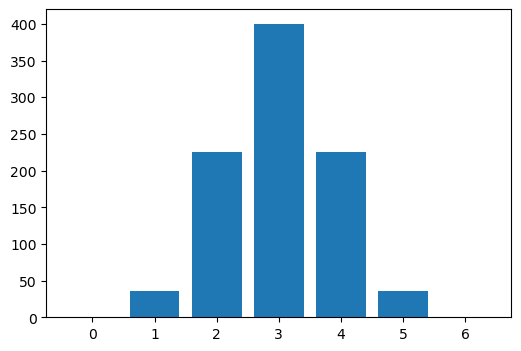

In [21]:
# Create a figure
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart
ax.bar(counts[0], counts[1]);

Ladies chances of guessing correct cups of tea:

- Chance of 0 correct = 1
- Chance of 1 correct = 36
- Chance of 2 correct = 225
- Chance of 3 correct = 400
- Chance of 4 correct = 225
- Chance of 5 correct = 36
- Chance of 6 correct = 1

In [22]:
# The probability that she (randomly) selects the 6 correct cups
1 / 924

0.0010822510822510823

In [23]:
# The probability that she (randomly) selects 5 out of the 6 correct cups
(36 + 1) / 924

0.04004329004329004

The probability of selecting 5 cups from 12 would be:

### 4%

Would I accept two errors? 

**No**

My reason for this is below

In [24]:
# The probability that she (randomly) selects 4 out of the 6 correct cups
(225 + 1) / 924

0.24458874458874458

The probability increases dramatically to 24% when she is allowed two errors and this is why I would not accept two errors.

## Task 2: numpy's Normal Distribution
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

Copying code from week05 lectures

In [25]:
# Generate a random normal sample of 100,000 values
data = np.random.normal(size=100000, loc=10.0, scale=3.0)

# Show
data

array([9.80751906, 5.00961286, 6.09094161, ..., 6.90688992, 9.87661727,
       6.22682376])

Histogram showing data sample.

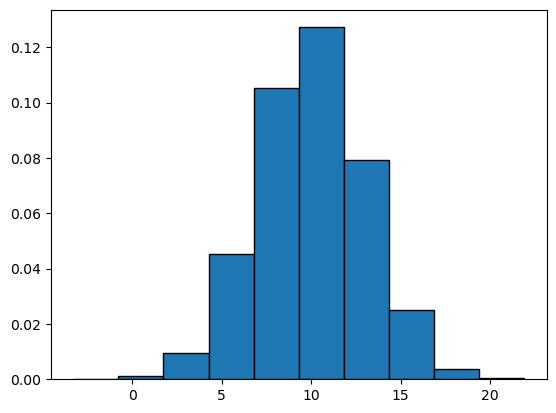

In [26]:
# Create a blank plot
fig, ax = plt.subplots()

# Create a histogram
ax.hist(data, edgecolor='black', density=True);

Q-q plot showing data sample.

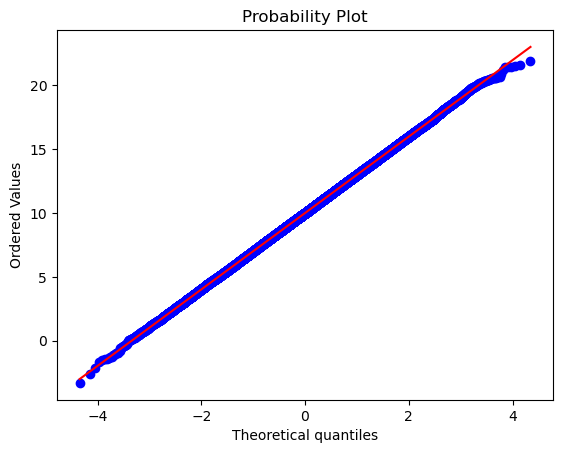

In [27]:
# Create an empty plot
fig, ax = plt.subplots()

# Create a q-q plot
stats.probplot(data, dist='norm', plot=ax);

Performing Shapiro Wilk test.

In [28]:
# Perform the Shapiro Wilk test
stats.shapiro(data)

c:\Users\Joanne Feeney\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9999794729235171, pvalue=0.9045478563701865)

From plotting the histogram and seeing the results of 0.233 from the Shapiro Wilks test, I do believe that the sample used above came from a normal distribution.

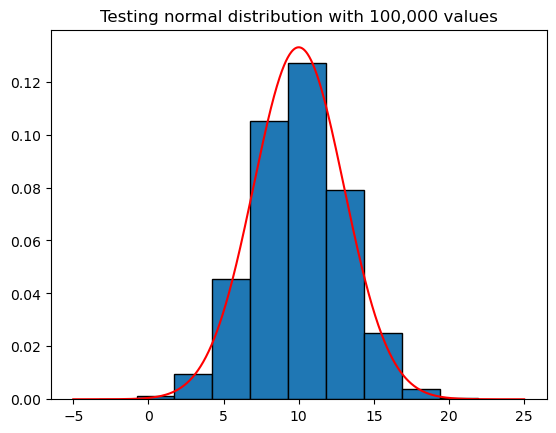

In [29]:
# Create a blank plot
fig, ax = plt.subplots()

# Create a histogram
ax.hist(data, edgecolor='black', density=True);

# Plot the corresponding normal distribution probability density function
# Created using help from Github co-pilot
# Create an x axis
x = np.linspace(-5, 25, 1000)
# Create a y axis
y = stats.norm.pdf(x, loc=10.0, scale=3.0)
# Plot
ax.plot(x, y, color='red');

# Add title
ax.set_title(f'Testing normal distribution with 100,000 values');


I believe numpy.random.normal() properly generates normal values.

## Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9

Before	63	68	70	64	74	67	70	57	66	65

After	64	64	68	64	73	70	72	54	61	63

Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

I took the above data and created a .csv file

In [30]:
# Reading in csv
data=pandas.read_csv(r'C:\Users\Joanne Feeney\cmder\repos\applied_statistics\datasets\task03_dataset.csv')

# Show head
data.head()

,PatientID,0,1,2,3,4,5,6,7,8,9
0,Before,63,68,70,64,74,67,70,57,66,65
1,After,64,64,68,64,73,70,72,54,61,63


In [31]:
# Splitting data into two groups
# Reference https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/ for changing string to float
before = data.iloc[0, 1:].astype(float)
after = data.iloc[1, 1:].astype(float)

In [32]:
before

0    63.0
1    68.0
2    70.0
3    64.0
4    74.0
5    67.0
6    70.0
7    57.0
8    66.0
9    65.0
Name: 0, dtype: float64

In [33]:
after

0    64.0
1    64.0
2    68.0
3    64.0
4    73.0
5    70.0
6    72.0
7    54.0
8    61.0
9    63.0
Name: 1, dtype: float64

Copying code from week07 & 08 lectures

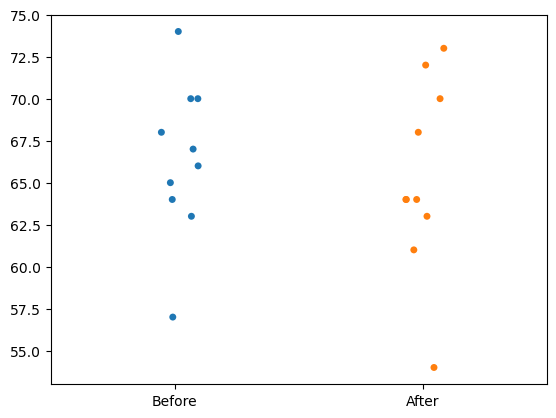

In [34]:
# Create a strip plot
sns.stripplot(data=[before, after]);
plt.xticks([0, 1], ['Before', 'After']);

The strip plot shows us how close in numbers the values of each group are.

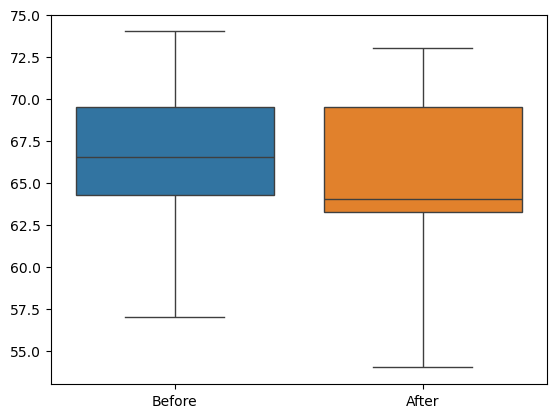

In [35]:
# Box plot
sns.boxplot(data=[before, after]);
# Labels
plt.xticks([0, 1], ['Before', 'After']);

As we can see, there is quite a lot of overlap between the 'Before' and 'After' resting hert rates for the patients.

We can see that 'After' is slightly lower than the 'Before' list.

The median value for 'Before' appears to be aprox. 66.5 and 'After' is approx. 64, which suggests a decrease in resting heart rate.

For scipy.stats on related samples, the Null Hypothesis is that the resting heart average values are identical.

In [36]:
# Perform a t-test on the two related samples
stats.ttest_rel(before, after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

The probability of seeing a value as extreme as 1.34 is 0.21 (21%), which is way above the cut off of 0.05.

I am rejecting the null hypothesis and am saying that the average values of the two samples are not identical due to the results of the t-test.

Copying code from week09 lectures

In [37]:
# Calculating the t-statistic
t_statistic, p_value = stats.ttest_rel(before, after)

# Show
t_statistic, p_value

(1.337227482480628, 0.21396011317404623)

The probability of seeing a t-statistic value as extreme as 1.34 is 0.21 (21%).

t-statstics vs. scipy.stats t-test result = both display that a value as extreme as 1.34 has a probability of 21%

## Task 4: ANOVA
In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

Copying code from week09 lectures

In [38]:
# Creating variable
no_type_ii = 0

In [39]:
# Generating three samples with 100 values each
# Sample 1
sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
# Sample 2
sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
# Sample 3
sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)

# Show
sample1, sample2, sample3

(array([5.01598385, 4.69465778, 4.9135895 , 4.84645331, 4.97799709,
        4.91210231, 4.99235486, 4.95183391, 5.03419917, 4.81057786,
        4.80141454, 4.92338596, 4.99523045, 5.1252078 , 4.95243904,
        4.85818309, 4.84718346, 4.73216758, 4.76663997, 4.76930305,
        4.8598823 , 4.9354985 , 4.99591036, 4.92125726, 4.95424013,
        4.84705706, 4.83429012, 4.97690996, 4.96726215, 4.93021615,
        4.88585683, 4.89214862, 4.89603632, 4.60081231, 4.97725053,
        4.93386601, 5.11379484, 4.88726831, 4.96740041, 4.84285215,
        4.83049147, 5.0126818 , 4.90373982, 4.95181571, 4.81480926,
        4.87798893, 5.07582677, 4.87338671, 4.82186125, 4.93831167,
        4.91235248, 4.80924968, 4.9918998 , 4.96781643, 4.88205582,
        5.08282749, 4.8747393 , 4.84313195, 4.78930724, 5.14891842,
        4.92226738, 4.91886326, 4.84528551, 4.94318373, 4.86510739,
        4.88942597, 4.93064061, 4.93776866, 4.85742021, 4.8927508 ,
        4.89913819, 4.95629319, 4.9155318 , 4.87

Getting the means.

In [42]:
# Means of the samples
np.mean(sample1), np.mean(sample2), np.mean(sample3)

(4.906482685013266, 4.977733177839585, 5.10854106365046)

Function to loop ANOVA test.

In [40]:
# Loop test 10,000 times
for _ in range(10000):
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(sample1, sample2, sample3)
    
    # p >= 0.05
    if p_value >= 0.05:
        no_type_ii += 1

# Probability of a type II error
probability = no_type_ii / 10000

# Show
probability

0.0

We are rejecting the (fasle) null hypothesis for this test.

The probability of committing a type II error (a false positive) in this particular circumstance is 0.0 (0%).

The means of the three samples are adequately different, relative to the standard deviation of 0.1.
